In [54]:
import numpy as np
import pandas as pd
import os,sys,glob
#import matplotlib.pyplot as plt
import matplotlib as plt
import nibabel as nib
from nilearn import plotting

%matplotlib inline

# Variables de l'étude

In [55]:
STUDY_PATH=os.path.join('/NAS','dumbo','protocoles','PACTE1')
SCRIPT_PATH=os.path.join(STUDY_PATH,'scripts')
BIDS_PATH=os.path.join(STUDY_PATH,'data','bids')


# Variables générales des atlas

In [56]:
# All parcelations list
parc = ['aparc-a2009s', 'aparc', 'economo', 'glasser-360',
         'schaefer-100','schaefer-200','schaefer-300','schaefer-400',
         'schaefer-500','schaefer-600','schaefer-700','schaefer-800',
         'schaefer-900','schaefer-1000','vosdewael-100','vosdewael-200',
         'vosdewael-300','vosdewael-400']

# Here we define the atlas 
atlas='aparc-a2009s'
#atlas=parc[0]

subcortical_labels = ['Left-Thalamus-Proper','Left-Caudate','Left-Putamen','Left-Pallidum','Left-Hippocampus','Left-Amygdala','Left-Accumbens-area','Right-Thalamus-Proper',
'Right-Caudate','Right-Putamen','Right-Pallidum','Right-Hippocampus','Right-Amygdala','Right-Accumbens-area']

cerebellum_labels = ['Left_I_IV','Right_I_IV','Left_V','Right_V','Left_VI','Vermis_VI','Right_VI','Left_CrusI','Vermis_CrusI','Right_CrusI','Left_CrusII','Vermis_CrusII','Right_CrusII', 'Left_VIIb','Vermis_VIIb','Right_VIIb','Left_VIIIa','Vermis_VIIIa','Right_VIIIa','Left_VIIIb','Vermis_VIIIb','Right_VIIIb','Left_IX','Vermis_IX','Right_IX','Left_X', 'Vermis_X','Right_X','Left_Dentate','Right_Dentate','Left_Interposed','Right_Interposed','Left_Fastigial','Right_Fastigial']

# Load LEFT annotation file in fsaverage5
annot_lh_fs5= nib.freesurfer.read_annot(f'/home/global/micapipe/parcellations/lh.{atlas}_mics.annot')
cortical_labels_lh = annot_lh_fs5[2][1:] 

# Load RIGHT annotation file in fsaverage5
annot_rh_fs5= nib.freesurfer.read_annot(f'/home/global/micapipe/parcellations/rh.{atlas}_mics.annot')
cortical_labels_rh = annot_rh_fs5[2][1:] 

labels=subcortical_labels.copy()
labels+=cerebellum_labels
labels+=['Unknown']
labels+=[labelC.decode('ASCII') + "_lh" for labelC in list(cortical_labels_lh)]
labels+=[labelC.decode('ASCII') + "_rh" for labelC in list(cortical_labels_rh)]
print("\nlen(subcortical_labels) = " + str(len(subcortical_labels)))
print("len(cerebellum_labels + Unknown) = " + str(len(cerebellum_labels)))
print("len(cortical_labels_lh) = " + str(len(cortical_labels_lh)))
print("len(cortical_labels_rh) = " + str(len(cortical_labels_rh)))
_=[print(str(i) + " : " + nom_label) for i,nom_label in enumerate(labels)]


len(subcortical_labels) = 14
len(cerebellum_labels + Unknown) = 34
len(cortical_labels_lh) = 75
len(cortical_labels_rh) = 75
0 : Left-Thalamus-Proper
1 : Left-Caudate
2 : Left-Putamen
3 : Left-Pallidum
4 : Left-Hippocampus
5 : Left-Amygdala
6 : Left-Accumbens-area
7 : Right-Thalamus-Proper
8 : Right-Caudate
9 : Right-Putamen
10 : Right-Pallidum
11 : Right-Hippocampus
12 : Right-Amygdala
13 : Right-Accumbens-area
14 : Left_I_IV
15 : Right_I_IV
16 : Left_V
17 : Right_V
18 : Left_VI
19 : Vermis_VI
20 : Right_VI
21 : Left_CrusI
22 : Vermis_CrusI
23 : Right_CrusI
24 : Left_CrusII
25 : Vermis_CrusII
26 : Right_CrusII
27 : Left_VIIb
28 : Vermis_VIIb
29 : Right_VIIb
30 : Left_VIIIa
31 : Vermis_VIIIa
32 : Right_VIIIa
33 : Left_VIIIb
34 : Vermis_VIIIb
35 : Right_VIIIb
36 : Left_IX
37 : Vermis_IX
38 : Right_IX
39 : Left_X
40 : Vermis_X
41 : Right_X
42 : Left_Dentate
43 : Right_Dentate
44 : Left_Interposed
45 : Right_Interposed
46 : Left_Fastigial
47 : Right_Fastigial
48 : Unknown
49 : G_and_S_fr

In [57]:
def load_fc(File):
    """Loads and process a functional connectome"""

    # load the matrix
    mtx_fs = nib.load(File).darrays[0].data

    # slice the matrix remove subcortical nodes and cerebellum = non car on veut la matrice entière
    # FC = mtx_fs[49:, 49:]
    FC = mtx_fs

    # Fisher transform
    FCz = np.arctanh(FC)

    # replace inf with 0
    FCz[~np.isfinite(FCz)] = 0

    # Mirror the matrix
    FCz = np.triu(FCz,1)+FCz.T
    return(FCz)


# Variables du patients

In [58]:
sub ="013_WRCO" #sys.argv[1]
ses="V0"
subjectID=f'sub-{sub}_ses-{ses}'
subjectDir=f'micapipe_v0.2.0/sub-{sub}/ses-{ses}' 
file_pattern = os.path.join(BIDS_PATH, 'derivatives_v2.0', subjectDir, 'func', 'desc-se_task-*_bold', 'surf', f'{subjectID}_atlas-{atlas}_desc-FC.shape.gii')
file_path = glob.glob(file_pattern)

print(file_path)
# Load the full connectome
mtx = load_fc(file_path[0])

if not os.path.exists(os.path.join(BIDS_PATH, 'derivatives_v2.0','NBS',f'sub-{sub}',f'ses-{ses}')):
    os.makedirs(os.path.join(BIDS_PATH, 'derivatives_v2.0','NBS',f'sub-{sub}',f'ses-{ses}'))

['/NAS/dumbo/protocoles/PACTE1/data/bids/derivatives_v2.0/micapipe_v0.2.0/sub-013_WRCO/ses-V0/func/desc-se_task-RsfMRI_acq-401FE_EPI64x64restingstate2D_bold/surf/sub-013_WRCO_ses-V0_atlas-aparc-a2009s_desc-FC.shape.gii']


/tmp/ipykernel_1569922/3658348163.py:12: RuntimeWarning: divide by zero encountered in arctanh
  FCz = np.arctanh(FC)


# FULL

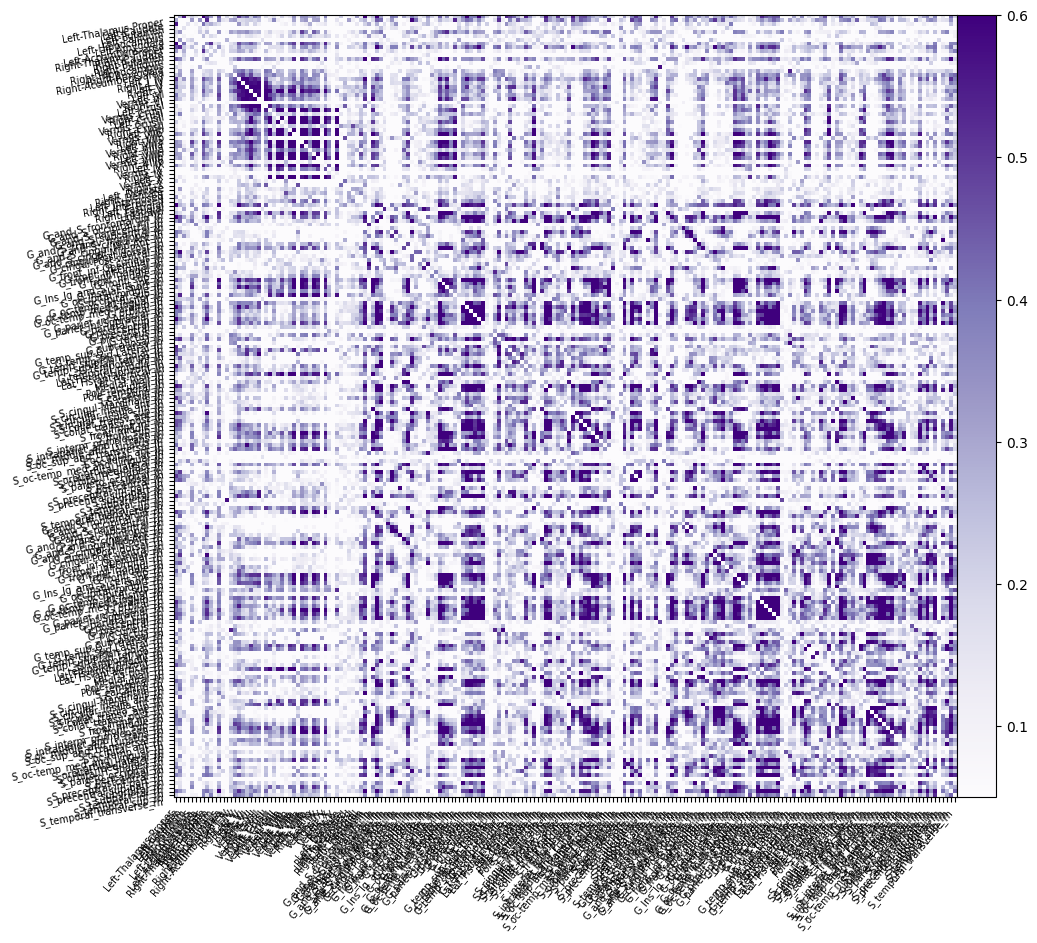

In [60]:
# Save full connectome to a txt file for NBS
#np.savetxt(os.path.join(BIDS_PATH, 'derivatives_v2.0','NBS',f'sub-{sub}',f'ses-{ses}',f'{sub}_{ses}.txt'), mtx, delimiter=' ', fmt='%f')
#print(mtx.shape)

# Plot matrix (without log)
corr_plot = plotting.plot_matrix(mtx, figure=(10, 10), labels=labels, cmap='Purples', vmin=0.05, vmax=0.6)
plt.pyplot.show()

# Wo medial wall

In [97]:
# Créer une nouvelle liste sans les éléments contenant "Medial_wall_"
labels_without_medial_wall = [label for label in labels if "Medial_wall_" not in label]
with open(os.path.join(BIDS_PATH, 'derivatives_v2.0', 'NBS', f'sub-{sub}', f'fMRInodeLabels_aparca2009s_fullnomedialwall.txt'), 'w') as f:
    for label in labels_without_medial_wall:
        f.write(f"{label}\n")

# Récupérer les indices des éléments contenant "Medial_wall_"
indices_medial_wall = [i for i, label in enumerate(labels) if "Medial_wall_" in label]

print("Labels without Medial_wall_:")
print(labels_without_medial_wall)
print("\nIndices of Medial_wall_ elements:")
print(indices_medial_wall)

mtx_nomedialwall = np.delete(mtx, indices_medial_wall, axis=0)
mtx_nomedialwall = np.delete(mtx_nomedialwall, indices_medial_wall, axis=1)

# Save full connectome to a txt file for NBS
np.savetxt(os.path.join(BIDS_PATH, 'derivatives_v2.0','NBS',f'sub-{sub}',f'ses-{ses}',f'{sub}_{ses}_womedialwall.txt'), mtx_nomedialwall, delimiter=' ', fmt='%f')

# Plot matrix (without log)
corr_plot = plotting.plot_matrix(mtx_nomedialwall, figure=(10, 10), labels=labels_without_medial_wall, cmap='Purples', vmin=0, vmax=1)
plt.pyplot.show()

Labels without Medial_wall_:
['Left-Thalamus-Proper', 'Left-Caudate', 'Left-Putamen', 'Left-Pallidum', 'Left-Hippocampus', 'Left-Amygdala', 'Left-Accumbens-area', 'Right-Thalamus-Proper', 'Right-Caudate', 'Right-Putamen', 'Right-Pallidum', 'Right-Hippocampus', 'Right-Amygdala', 'Right-Accumbens-area', 'Left_I_IV', 'Right_I_IV', 'Left_V', 'Right_V', 'Left_VI', 'Vermis_VI', 'Right_VI', 'Left_CrusI', 'Vermis_CrusI', 'Right_CrusI', 'Left_CrusII', 'Vermis_CrusII', 'Right_CrusII', 'Left_VIIb', 'Vermis_VIIb', 'Right_VIIb', 'Left_VIIIa', 'Vermis_VIIIa', 'Right_VIIIa', 'Left_VIIIb', 'Vermis_VIIIb', 'Right_VIIIb', 'Left_IX', 'Vermis_IX', 'Right_IX', 'Left_X', 'Vermis_X', 'Right_X', 'Left_Dentate', 'Right_Dentate', 'Left_Interposed', 'Right_Interposed', 'Left_Fastigial', 'Right_Fastigial', 'Unknown', 'G_and_S_frontomargin_lh', 'G_and_S_occipital_inf_lh', 'G_and_S_paracentral_lh', 'G_and_S_subcentral_lh', 'G_and_S_transv_frontopol_lh', 'G_and_S_cingul-Ant_lh', 'G_and_S_cingul-Mid-Ant_lh', 'G_and_S

# Remove SubCortical, Cerebellum and unknown nodes

0 : G_and_S_frontomargin_lh
1 : G_and_S_occipital_inf_lh
2 : G_and_S_paracentral_lh
3 : G_and_S_subcentral_lh
4 : G_and_S_transv_frontopol_lh
5 : G_and_S_cingul-Ant_lh
6 : G_and_S_cingul-Mid-Ant_lh
7 : G_and_S_cingul-Mid-Post_lh
8 : G_cingul-Post-dorsal_lh
9 : G_cingul-Post-ventral_lh
10 : G_cuneus_lh
11 : G_front_inf-Opercular_lh
12 : G_front_inf-Orbital_lh
13 : G_front_inf-Triangul_lh
14 : G_front_middle_lh
15 : G_front_sup_lh
16 : G_Ins_lg_and_S_cent_ins_lh
17 : G_insular_short_lh
18 : G_occipital_middle_lh
19 : G_occipital_sup_lh
20 : G_oc-temp_lat-fusifor_lh
21 : G_oc-temp_med-Lingual_lh
22 : G_oc-temp_med-Parahip_lh
23 : G_orbital_lh
24 : G_pariet_inf-Angular_lh
25 : G_pariet_inf-Supramar_lh
26 : G_parietal_sup_lh
27 : G_postcentral_lh
28 : G_precentral_lh
29 : G_precuneus_lh
30 : G_rectus_lh
31 : G_subcallosal_lh
32 : G_temp_sup-G_T_transv_lh
33 : G_temp_sup-Lateral_lh
34 : G_temp_sup-Plan_polar_lh
35 : G_temp_sup-Plan_tempo_lh
36 : G_temporal_inf_lh
37 : G_temporal_middle_lh
38

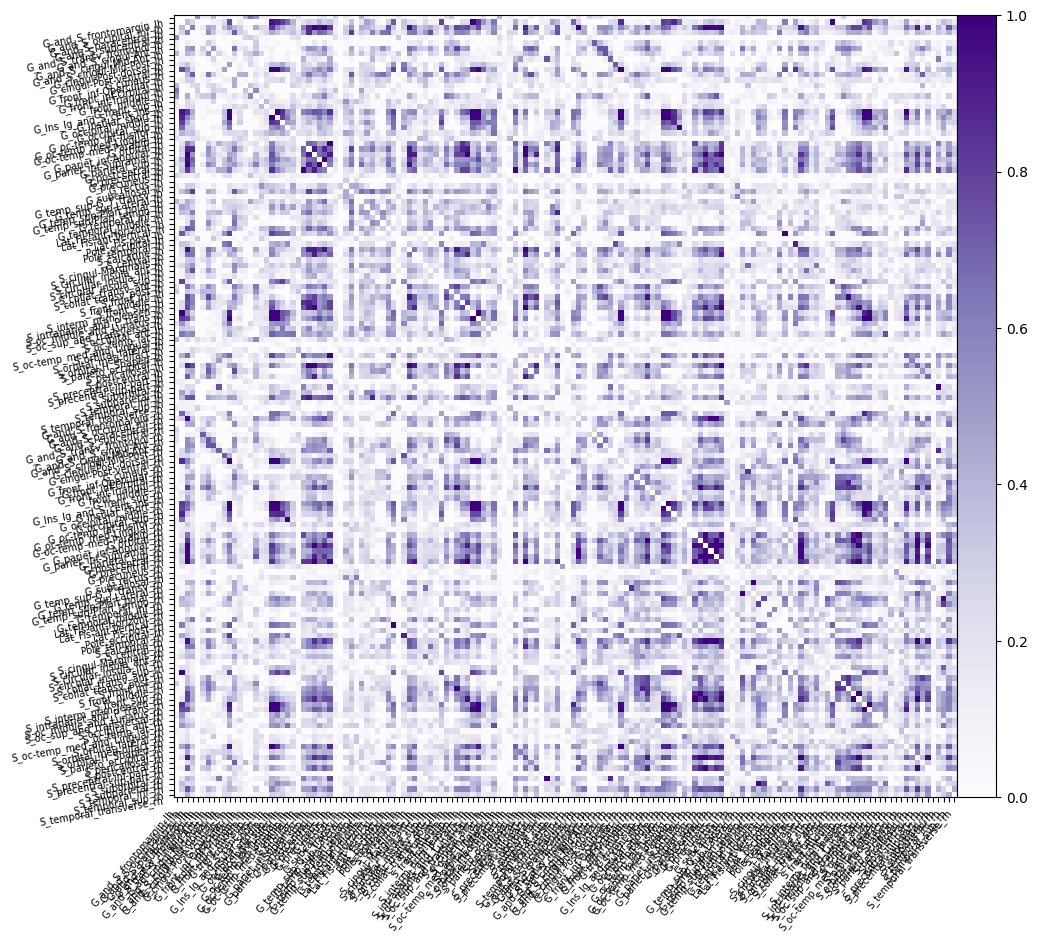

In [ ]:
labels_cortexnomedialwall = labels_without_medial_wall[49:]
[print(str(i) + " : " + nom_label) for i,nom_label in enumerate(labels_cortexnomedialwall)]

with open(os.path.join(BIDS_PATH, 'derivatives_v2.0', 'NBS', f'sub-{sub}', f'fMRInodeLabels_aparca2009s_cortexnomedialwall.txt'), 'w') as f:
    for label in labels_without_medial_wall:
        f.write(f"{label}\n")

mtx_cortexnomedialwall = mtx_nomedialwall[49:, 49:]

# Save full connectome to a txt file for NBS
np.savetxt(os.path.join(BIDS_PATH, 'derivatives_v2.0','NBS',f'sub-{sub}',f'ses-{ses}',f'{sub}_{ses}_cortexwomedialwall.txt'), mtx_cortexnomedialwall, delimiter=' ', fmt='%f')

# Plot matrix (without log)
corr_plot = plotting.plot_matrix(mtx_cortexnomedialwall, figure=(10, 10), labels=labels_cortexnomedialwall, cmap='Purples', vmin=0, vmax=1)
plt.pyplot.show()

 # Remove the Cerebellar and unknown nodes 

['Left-Thalamus-Proper', 'Left-Caudate', 'Left-Putamen', 'Left-Pallidum', 'Left-Hippocampus', 'Left-Amygdala', 'Left-Accumbens-area', 'Right-Thalamus-Proper', 'Right-Caudate', 'Right-Putamen', 'Right-Pallidum', 'Right-Hippocampus', 'Right-Amygdala', 'Right-Accumbens-area', 'G_and_S_frontomargin_lh', 'G_and_S_occipital_inf_lh', 'G_and_S_paracentral_lh', 'G_and_S_subcentral_lh', 'G_and_S_transv_frontopol_lh', 'G_and_S_cingul-Ant_lh', 'G_and_S_cingul-Mid-Ant_lh', 'G_and_S_cingul-Mid-Post_lh', 'G_cingul-Post-dorsal_lh', 'G_cingul-Post-ventral_lh', 'G_cuneus_lh', 'G_front_inf-Opercular_lh', 'G_front_inf-Orbital_lh', 'G_front_inf-Triangul_lh', 'G_front_middle_lh', 'G_front_sup_lh', 'G_Ins_lg_and_S_cent_ins_lh', 'G_insular_short_lh', 'G_occipital_middle_lh', 'G_occipital_sup_lh', 'G_oc-temp_lat-fusifor_lh', 'G_oc-temp_med-Lingual_lh', 'G_oc-temp_med-Parahip_lh', 'G_orbital_lh', 'G_pariet_inf-Angular_lh', 'G_pariet_inf-Supramar_lh', 'G_parietal_sup_lh', 'G_postcentral_lh', 'G_precentral_lh', '

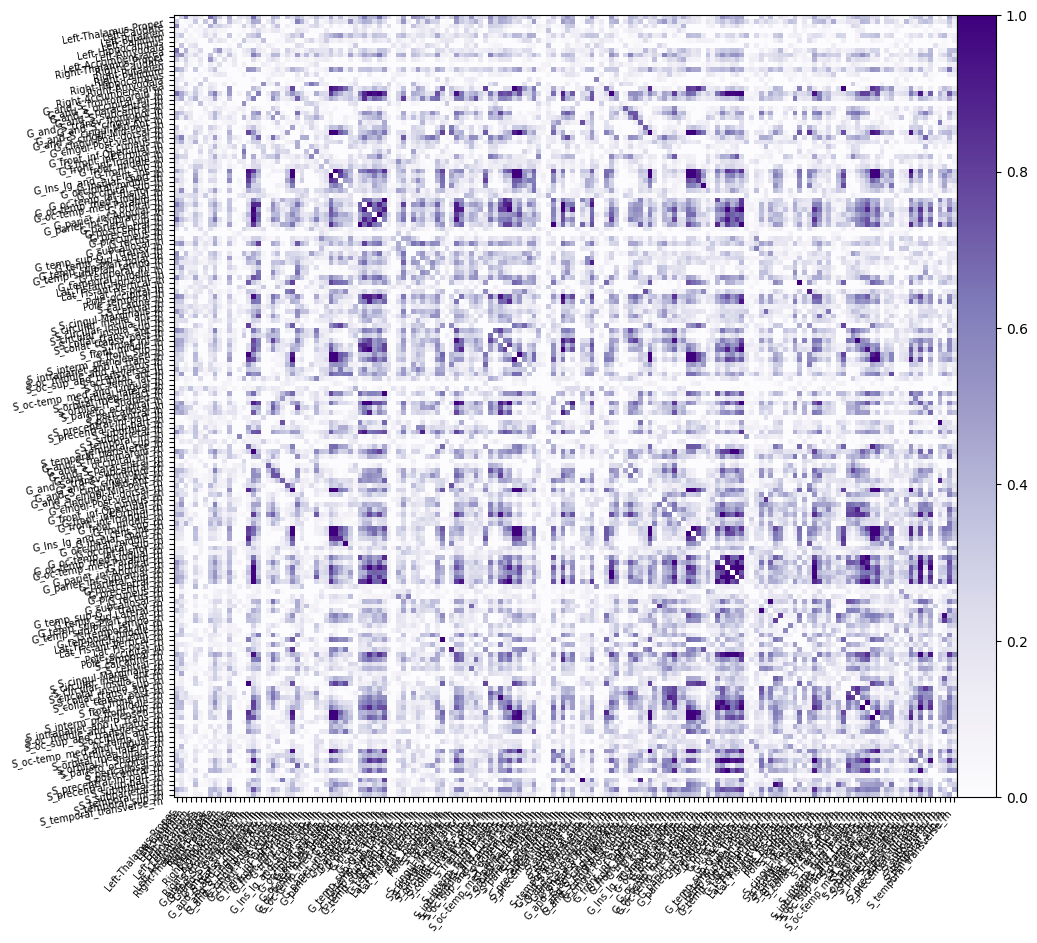

In [127]:

labels_new = labels_without_medial_wall.copy()
# Supprimer les 34 indices à partir du 14ième dans labels_without_medial_wall
del labels_new[14:14+35]

print(labels_new)
with open(os.path.join(BIDS_PATH, 'derivatives_v2.0', 'NBS', f'sub-{sub}', f'fMRInodeLabels_aparca2009s_cortexsubcorticalnomedialwall.txt'), 'w') as f:
    for label in labels_new:
        f.write(f"{label}\n")

# on retire les noeuds cérébelleux du connectome
mtx_cortexsubcorticalnomedialwall = mtx_nomedialwall.copy()
mtx_cortexsubcorticalnomedialwall=np.delete(mtx_cortexsubcorticalnomedialwall,range(14, 14+35), axis=0)
mtx_cortexsubcorticalnomedialwall=np.delete(mtx_cortexsubcorticalnomedialwall,range(14, 14+35), axis=1)

np.savetxt(os.path.join(BIDS_PATH, 'derivatives_v2.0','NBS',f'sub-{sub}',f'ses-{ses}',f'{sub}_{ses}_cortexsubcorticalnomedialwall.txt'), mtx_cortexsubcorticalnomedialwall, delimiter=' ', fmt='%f')
# Plot matrix (without log)
corr_plot = plotting.plot_matrix(mtx_cortexsubcorticalnomedialwall, figure=(10, 10), labels=labels_new, cmap='Purples', vmin=0, vmax=1)
plt.pyplot.show()

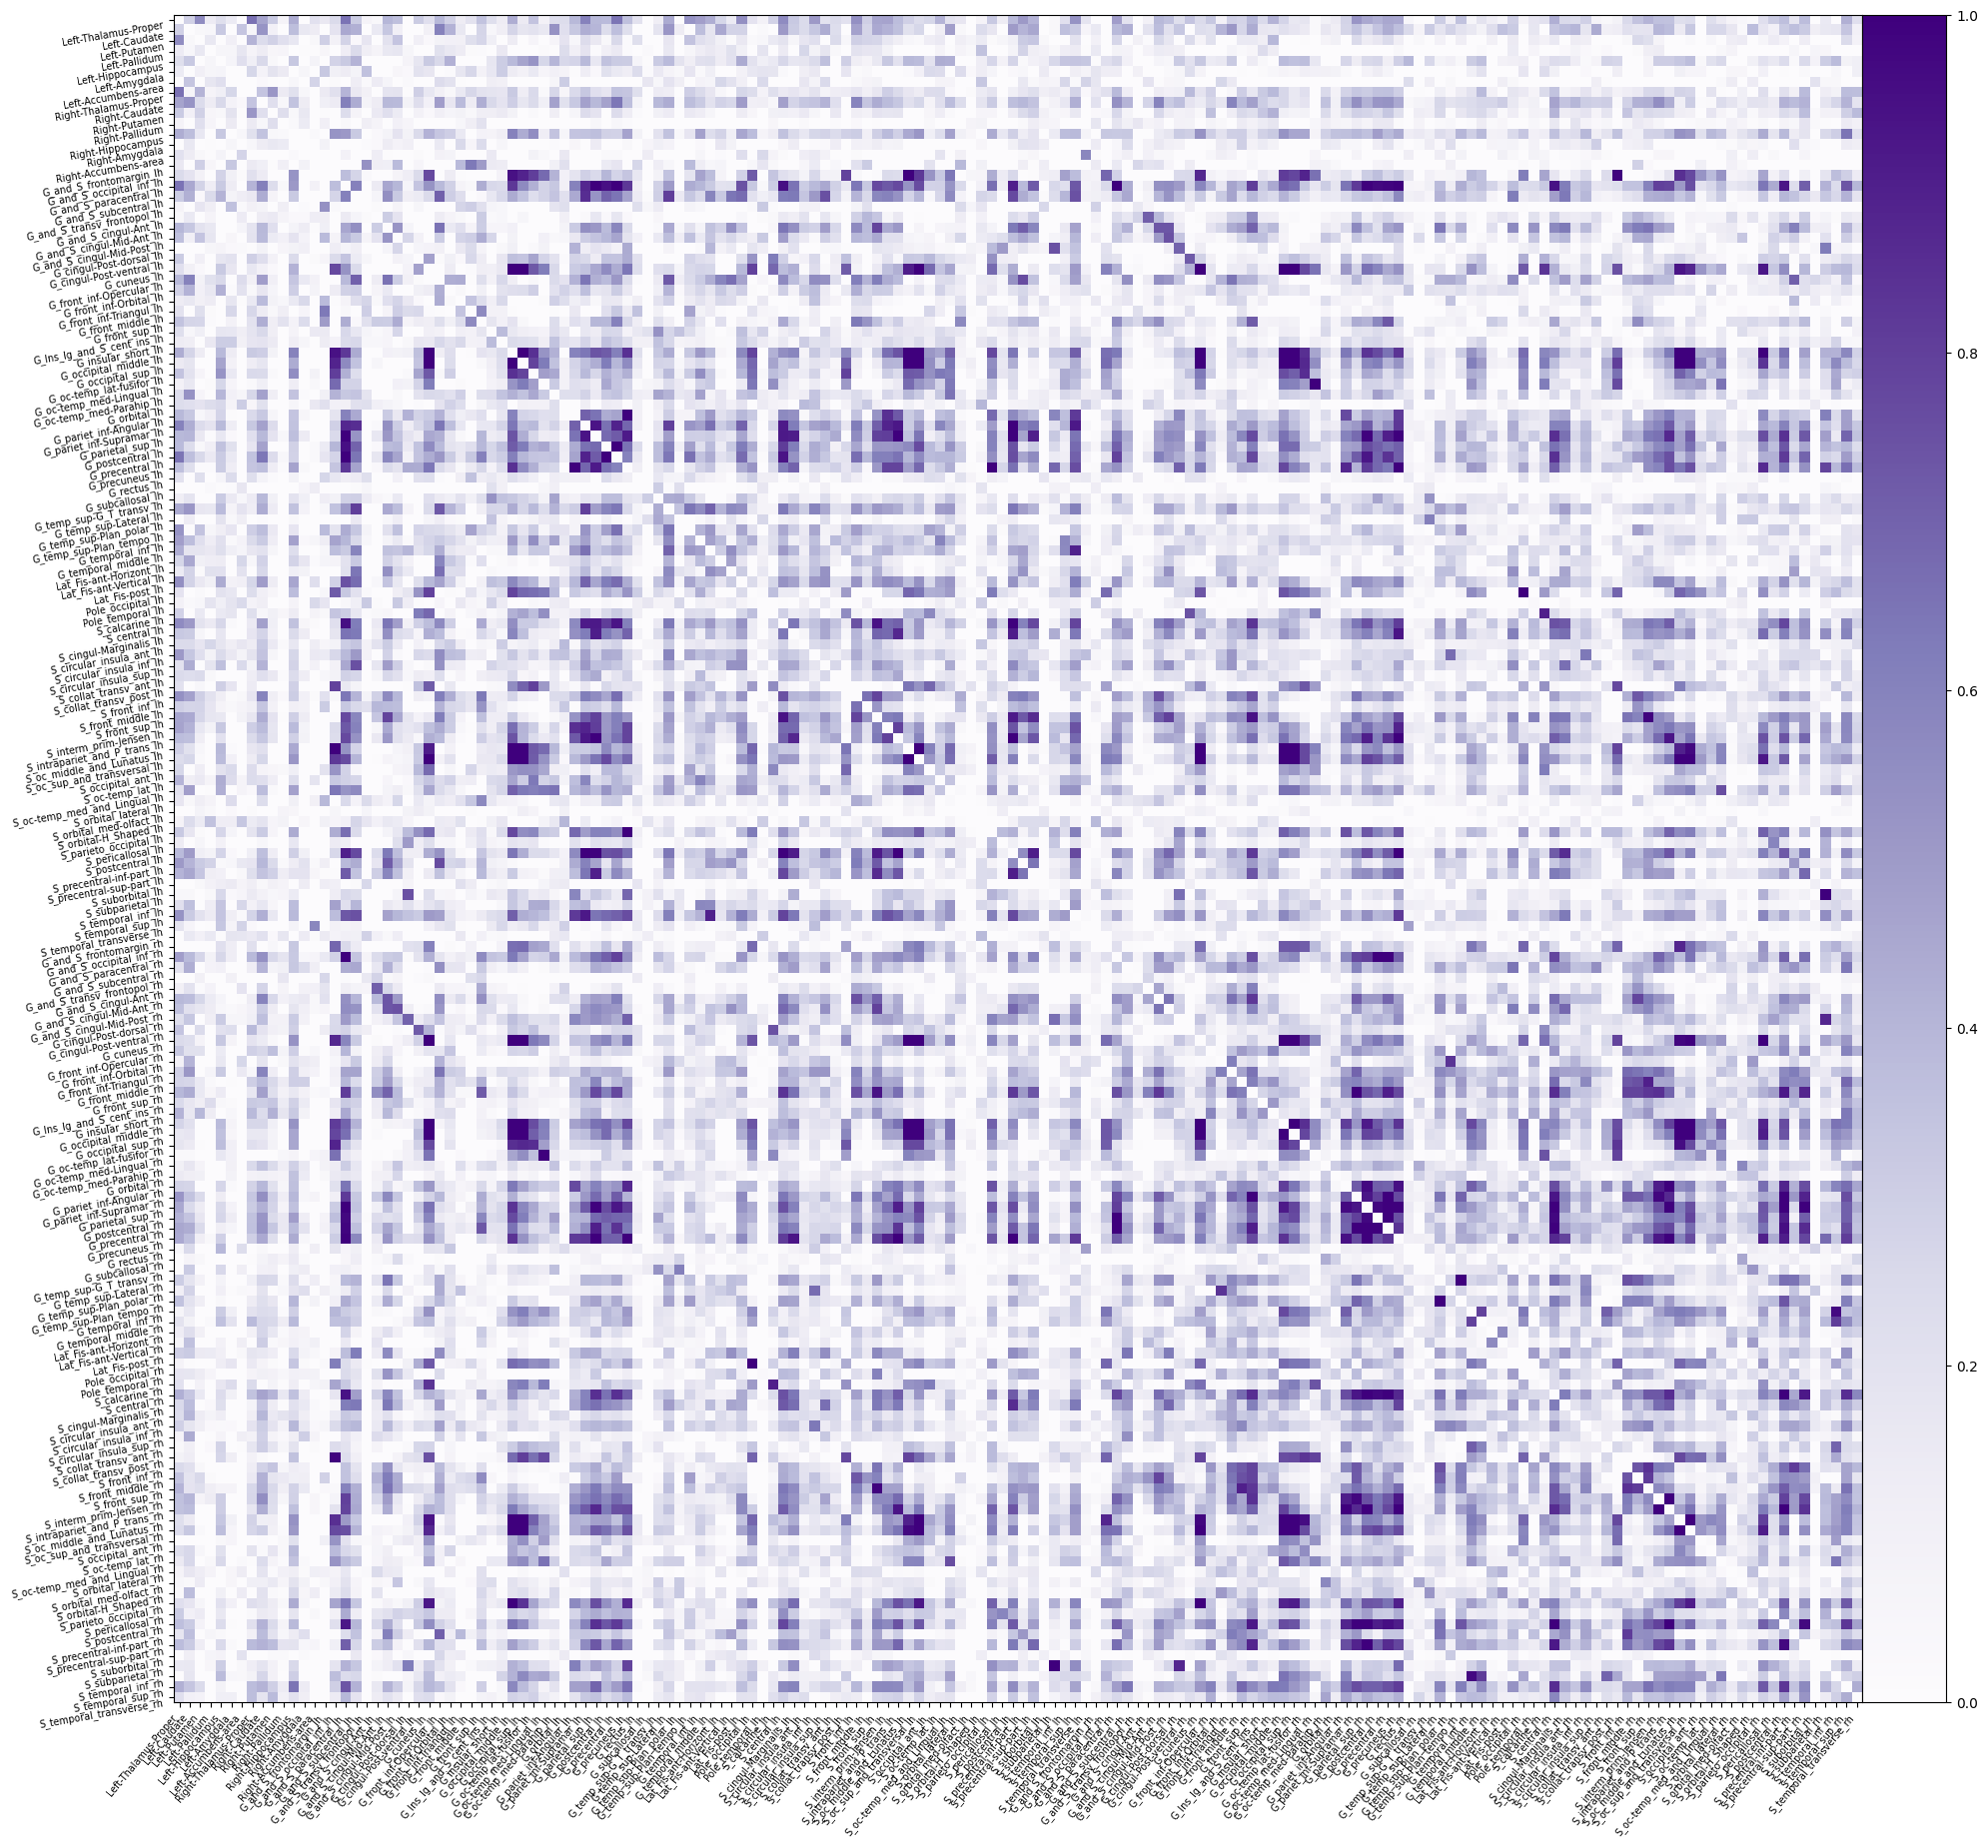

In [133]:

# Plot matrix (without log)
corr_plot = plotting.plot_matrix(mtx_cortexsubcorticalnomedialwall, figure=(20, 20), labels=labels_new, cmap='Purples', vmin=0, vmax=1)
plt.savefig(os.path.join(BIDS_PATH, 'derivatives_v2.0','NBS',f'sub-{sub}',f'ses-{ses}',f'{sub}_{ses}_cortexsubcorticalnomedialwall.jpg'), format='jpeg')

# BIDS Validator

In [ ]:
pip install bids_validator
pip install niworkflows

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Note: you may need to restart the kernel to use updated packages.


In [22]:
from bids_validator import BIDSValidator

In [5]:
os.path.join(STUDY_PATH,'ds000240','sub-01','anat','sub-01_T1w.nii.gz')

'/NAS/dumbo/protocoles/PACTE1/ds000240/sub-01/anat/sub-01_T1w.nii.gz'

In [24]:
BIDSValidator().is_bids(BIDS_PATH)

False

In [23]:
from niworkflows.utils.bids import collect_participants

BIDS_TEST=os.path.join(STUDY_PATH,'data','bids')
participants = collect_participants(BIDS_TEST)

print(participants)

BIDSError: 
---------- BIDS root folder: "/NAS/dumbo/protocoles/PACTE1/data/bids" ----------
           Could not find participants. Please make sure the BIDS data structure is present and correct. Datasets can be validated online using the BIDS Validator (https://bids-standard.github.io/bids-validator/).
If you are using Docker for Mac or Docker for Windows, you may need to adjust your "File sharing" preferences.
--------------------------------------------------------------------------------

In [13]:
from niworkflows.utils.bids import collect_participants

participants = collect_participants("/NAS/dumbo/protocoles/PACTE1/data/bids_06052025_2")

print(participants)

['004']


In [17]:
from niworkflows.utils.bids import collect_participants

participants = collect_participants(BIDS_PATH)

print(participants)

BIDSError: 
---------- BIDS root folder: "/NAS/dumbo/protocoles/PACTE1/data/bids" ----------
           Could not find participants. Please make sure the BIDS data structure is present and correct. Datasets can be validated online using the BIDS Validator (https://bids-standard.github.io/bids-validator/).
If you are using Docker for Mac or Docker for Windows, you may need to adjust your "File sharing" preferences.
--------------------------------------------------------------------------------

### MODIF de la base BIDS

In [24]:
import os

def rename_files_in_directory(directory):
    """
    Renomme les fichiers dans un répertoire en supprimant "_DEMY" de leurs noms.

    Args:
        directory (str): Chemin du répertoire contenant les fichiers à renommer.
    """
    STR2REPLACE=directory[-5:]
    # Parcourir tous les fichiers et sous-répertoires
    for root, dirs, files in os.walk(directory):
        for file_name in files:
            # Vérifier si "_DEMY" est dans le nom du fichier
            if STR2REPLACE in file_name:
                # Nouveau nom de fichier sans "_DEMY"
                new_file_name = file_name.replace(STR2REPLACE, "")
                # Chemins complets pour l'ancien et le nouveau fichier
                old_file_path = os.path.join(root, file_name)
                new_file_path = os.path.join(root, new_file_name)
                # Renommer le fichier
                os.rename(old_file_path, new_file_path)

    print(f"Renommage des {STR2REPLACE} terminé dans le répertoire : {directory}")

In [25]:
BIDS_PATH=os.path.join(STUDY_PATH,'data','bidsmod4ASLprep')

# Parcourir chaque répertoire dans BIDS_PATH
for sub_dir in os.listdir(BIDS_PATH):
    if sub_dir.startswith('sub-'):
        sub_path = os.path.join(BIDS_PATH, sub_dir)
        if os.path.isdir(sub_path):
            rename_files_in_directory(sub_path)

Renommage des _DEMY terminé dans le répertoire : /NAS/dumbo/protocoles/PACTE1/data/bidsmod4ASLprep/sub-004_DEMY
Renommage des _RESA terminé dans le répertoire : /NAS/dumbo/protocoles/PACTE1/data/bidsmod4ASLprep/sub-005_RESA
Renommage des _LECO terminé dans le répertoire : /NAS/dumbo/protocoles/PACTE1/data/bidsmod4ASLprep/sub-006_LECO
Renommage des _DEPA terminé dans le répertoire : /NAS/dumbo/protocoles/PACTE1/data/bidsmod4ASLprep/sub-007_DEPA
Renommage des _DEBE terminé dans le répertoire : /NAS/dumbo/protocoles/PACTE1/data/bidsmod4ASLprep/sub-008_DEBE
Renommage des _DEPE terminé dans le répertoire : /NAS/dumbo/protocoles/PACTE1/data/bidsmod4ASLprep/sub-008_DEPE
Renommage des _BLAN terminé dans le répertoire : /NAS/dumbo/protocoles/PACTE1/data/bidsmod4ASLprep/sub-010_BLAN
Renommage des _WRCO terminé dans le répertoire : /NAS/dumbo/protocoles/PACTE1/data/bidsmod4ASLprep/sub-013_WRCO
Renommage des _ANAL terminé dans le répertoire : /NAS/dumbo/protocoles/PACTE1/data/bidsmod4ASLprep/sub-0

verif avec  ls data/bidsmod4ASLprep/sub-*/ses-V*/perf/*.json | xargs grep -i M0

In [23]:
import json
BIDS_PATH=os.path.join(STUDY_PATH,'data','bids')

# Parcourir chaque répertoire dans BIDS_PATH
for sub_dir in os.listdir(BIDS_PATH):
    if sub_dir.startswith('sub-'):
        sub_path = os.path.join(BIDS_PATH, sub_dir)
        for ses_dir in os.listdir(sub_path):
            if ses_dir.startswith('ses-'):
                perf_path = os.path.join(sub_path, ses_dir, 'perf')
                if os.path.isdir(perf_path):
                    for json_file in glob.glob(os.path.join(perf_path, '*.json')):
                        # Charger le contenu du fichier JSON
                        with open(json_file, 'r') as f:
                            data = json.load(f)
                        
                        # Ajouter ou mettre à jour la clé "M0Type"
                        data["M0Type"] = "Included"
                        data["RepetitionTimePreparation"] = data["RepetitionTime"]
                        # Sauvegarder les modifications dans le fichier JSON
                        with open(json_file, 'w') as f:
                            json.dump(data, f, indent=4)
                        
                        print(f"Updated {json_file}")

Updated /NAS/dumbo/protocoles/PACTE1/data/bids/sub-015_LHMA/ses-V4/perf/sub-015_LHMA_ses-V4_acq-1001PCASLSENSE2D_asl.json
Updated /NAS/dumbo/protocoles/PACTE1/data/bids/sub-015_LHMA/ses-V0/perf/sub-015_LHMA_ses-V0_acq-1001PCASLSENSE2D_asl.json
Updated /NAS/dumbo/protocoles/PACTE1/data/bids/sub-004_DEMY/ses-V0/perf/sub-004_DEMY_ses-V0_acq-1001PCASLSENSE2D_asl.json
Updated /NAS/dumbo/protocoles/PACTE1/data/bids/sub-004_DEMY/ses-V4/perf/sub-004_DEMY_ses-V4_acq-1001PCASLSENSE2D_asl.json
Updated /NAS/dumbo/protocoles/PACTE1/data/bids/sub-032_DEJA/ses-V4/perf/sub-032_DEJA_ses-V4_acq-1001PCASLSENSE2D_asl.json
Updated /NAS/dumbo/protocoles/PACTE1/data/bids/sub-032_DEJA/ses-V0/perf/sub-032_DEJA_ses-V0_acq-1001PCASLSENSE2D_asl.json
Updated /NAS/dumbo/protocoles/PACTE1/data/bids/sub-032_DEJA/ses-V0/perf/sub-032_DEJA_ses-V0_acq-1003SOURCE-PCASLSENSE2D_asl.json
Updated /NAS/dumbo/protocoles/PACTE1/data/bids/sub-031_GABE/ses-V4/perf/sub-031_GABE_ses-V4_acq-1001PCASLSENSE2D_asl.json
Updated /NAS/dumb

# Calcul le délai entre deux sessions IRM :

In [49]:
# List all files matching the pattern
session_files = glob.glob(os.path.join(BIDS_PATH, '*', '*_sessions.tsv'))

# Read and print the content of each file
for file in session_files:
    print(f"Reading file: {file}")
    df = pd.read_csv(file, sep='\t')    
    # Extract the third column 'session_acquisition_date'
    # Convert the 'session_acquisition_date' column to datetime format
    dates = pd.to_datetime(df['session_acquisition_date'].astype(str), format='%Y%m%d')
    # Ensure there are at least two dates to calculate the difference
    if len(dates) >= 2:
        # Calculate the difference in days between the first two dates
        delta_days = (dates.iloc[1] - dates.iloc[0]).days
        print(f"Number of days between the two dates: {delta_days}")
    else:
        print("Not enough dates to calculate the difference.")

Reading file: /NAS/dumbo/protocoles/PACTE1/data/bids/sub-015_LHMA/sub-015_LHMA_sessions.tsv
Number of days between the two dates: 49
Reading file: /NAS/dumbo/protocoles/PACTE1/data/bids/sub-004_DEMY/sub-004_DEMY_sessions.tsv
Number of days between the two dates: 58
Reading file: /NAS/dumbo/protocoles/PACTE1/data/bids/sub-032_DEJA/sub-032_DEJA_sessions.tsv
Number of days between the two dates: 49
Reading file: /NAS/dumbo/protocoles/PACTE1/data/bids/sub-031_GABE/sub-031_GABE_sessions.tsv
Number of days between the two dates: 52
Reading file: /NAS/dumbo/protocoles/PACTE1/data/bids/sub-021_DEBE/sub-021_DEBE_sessions.tsv
Number of days between the two dates: 56
Reading file: /NAS/dumbo/protocoles/PACTE1/data/bids/sub-038_HSTI/sub-038_HSTI_sessions.tsv
Number of days between the two dates: 52
Reading file: /NAS/dumbo/protocoles/PACTE1/data/bids/sub-005_RESA/sub-005_RESA_sessions.tsv
Number of days between the two dates: 58
Reading file: /NAS/dumbo/protocoles/PACTE1/data/bids/sub-023_DEMA/sub

freeview data/bids/sub-019_BOMA/ses-V4/perf/sub-019_BOMA_ses-V4_acq-1001PCASLSENSE2D_asl.nii.gz data/bids/derivatives_v2.0/fastsurfer/sub-019_BOMA_ses-V4/ASL/bbr/cbf_pvc_s/native_space/perfusion_calib.nii.gz

In [52]:
# Charger le fichier participants.tsv
participants_file = os.path.join(BIDS_PATH, 'participants.tsv')
participants_df = pd.read_csv(participants_file, sep='\t')

# Parcourir les participants et leurs sessions
for _, row in participants_df.iterrows():
    participant_id = row['participant_id']
    
    # Vérifier si le fichier existe
    file_to_check_V0 = os.path.join(BIDS_PATH, 'derivatives_v2.0', 'fastsurfer', f'{participant_id}_ses-V0', 'ASL', 'bbr', 'cbf_pvc_s', 'native_space', 'perfusion_calib.nii.gz')
    file_to_check_V4 = os.path.join(BIDS_PATH, 'derivatives_v2.0', 'fastsurfer', f'{participant_id}_ses-V4', 'ASL', 'bbr', 'cbf_pvc_s', 'native_space', 'perfusion_calib.nii.gz')
    if os.path.exists(file_to_check_V0) and os.path.exists(file_to_check_V4):
        print(f"Participant: {participant_id} - Les fichiers V0 et V4 existent.")
    elif os.path.exists(file_to_check_V0):
        print(f"Participant: {participant_id} - Seul le fichier V0 existe.")
    elif os.path.exists(file_to_check_V4):
        print(f"Participant: {participant_id} - Seul le fichier V4 existe.")
    else:
        print(f"Participant: {participant_id} - Aucun des fichiers V0 ou V4 n'existe.")


Participant: sub-004_DEMY - Les fichiers V0 et V4 existent.
Participant: sub-005_RESA - Les fichiers V0 et V4 existent.
Participant: sub-006_LECO - Les fichiers V0 et V4 existent.
Participant: sub-007_DEPA - Les fichiers V0 et V4 existent.
Participant: sub-008_DEBE - Les fichiers V0 et V4 existent.
Participant: sub-010_BLAN - Les fichiers V0 et V4 existent.
Participant: sub-013_WRCO - Les fichiers V0 et V4 existent.
Participant: sub-015_LHMA - Les fichiers V0 et V4 existent.
Participant: sub-017_PICA - Seul le fichier V0 existe.
Participant: sub-019_BOMA - Les fichiers V0 et V4 existent.
Participant: sub-021_DEBE - Seul le fichier V0 existe.
Participant: sub-023_DEMA - Les fichiers V0 et V4 existent.
Participant: sub-024_RIMA - Les fichiers V0 et V4 existent.
Participant: sub-026_HAEL - Les fichiers V0 et V4 existent.
Participant: sub-027_DEJA - Seul le fichier V4 existe.
Participant: sub-029_SEMA - Les fichiers V0 et V4 existent.
Participant: sub-031_GABE - Les fichiers V0 et V4 exist

##########################
Creation des design matrix pour NBS
##########################

In [63]:
# Lire le fichier participants.tsv
participants_file = os.path.join(BIDS_PATH, 'participants.tsv')
participants_df = pd.read_csv(participants_file, sep='\t')

# Regrouper les GROUP 1 avec 3 et 2 avec 4
participants_df['GROUP_Ritaline'] = participants_df['GROUP'].replace({3: 1, 4: 2})

# Regrouper les GROUP 1 avec 3 et 2 avec 4
participants_df['GROUP_EC'] = participants_df['GROUP'].replace({2: 1, 4: 2, 3: 2})

# # Sauvegarder la matrice de design dans un fichier
design_matrix = os.path.join(STUDY_PATH,'NBS','NBS_Ritaline','V0','design_matrix.txt')
design_matrix_Ritaline = pd.get_dummies(participants_df['GROUP_Ritaline'], prefix='GROUP')
design_matrix_Ritaline.to_csv(design_matrix, sep='\t', index=False)

design_matrix = os.path.join(STUDY_PATH, 'NBS','NBS_EC','V0','design_matrix.txt')
design_matrix_EC = pd.get_dummies(participants_df['GROUP_EC'], prefix='GROUP')
design_matrix_EC.to_csv(design_matrix, sep='\t', index=False)

# Supprimer le sujet sub-017_PICA de participants_df
participants_df = participants_df[participants_df['participant_id'] != 'sub-017_PICA']

design_matrix = os.path.join(STUDY_PATH,'NBS','NBS_Ritaline','V4','design_matrix.txt')
design_matrix_Ritaline = pd.get_dummies(participants_df['GROUP_Ritaline'], prefix='GROUP')
design_matrix_Ritaline.to_csv(design_matrix, sep='\t', index=False)

design_matrix = os.path.join(STUDY_PATH,'NBS','NBS_EC','V4','design_matrix.txt')
design_matrix_EC = pd.get_dummies(participants_df['GROUP_EC'], prefix='GROUP')
design_matrix_EC.to_csv(design_matrix, sep='\t', index=False)

# Replace True/False with 1/0 in the design matrix files
for design_matrix_path in [
    os.path.join(STUDY_PATH, 'NBS', 'NBS_Ritaline', 'V0', 'design_matrix.txt'),
    os.path.join(STUDY_PATH, 'NBS', 'NBS_EC', 'V0', 'design_matrix.txt'),
    os.path.join(STUDY_PATH, 'NBS', 'NBS_Ritaline', 'V4', 'design_matrix.txt'),
    os.path.join(STUDY_PATH, 'NBS', 'NBS_EC', 'V4', 'design_matrix.txt')
]:
    # Read the design matrix
    design_df = pd.read_csv(design_matrix_path, sep='\t')
    # Replace True/False with 1/0
    design_df = design_df.astype(int)
    
    # Save the updated design matrix
    design_df.to_csv(design_matrix_path, sep='\t', index=False,header=False)



##########################
Creation des matrices mat pour NBS
##########################

In [ ]:
from scipy.io import savemat

# Lire le fichier participants.tsv
participants_file = os.path.join(BIDS_PATH, 'participants.tsv')
participants_df = pd.read_csv(participants_file, sep='\t')

# Initialize a 3D matrix to store data for all subjects
num_subjects = len(participants_df)
matrix_3d = np.zeros((162,162, num_subjects))

# Loop through each participant
for index, (i, row) in enumerate(participants_df.iterrows()):
    participant_id = row['participant_id']
    for ses in ['V0']:
        # Construct the file path
        file_path = os.path.join(BIDS_PATH, 'derivatives_v2.0', 'NBS', participant_id, f'ses-{ses}', f'{participant_id.split("-")[1]}_{ses}_cortexsubcorticalnomedialwall.txt')
        # Check if the file exists
        if os.path.exists(file_path):
            print(f"Reading file: {file_path}")
            # Read the file
            data = np.loadtxt(file_path)

            # Add the current subject's data to the 3D matrix
            matrix_3d[:, :, index] = data
        else:
            print(f"File not found: {file_path}")


###################
###### V0 #########
###################

# design_matrix = os.path.join(STUDY_PATH,'NBS','NBS_Ritaline','V0','matrices.mat')
# # Save the 3D matrix to a .mat file
# savemat(f"{design_matrix}", {"data": matrix_3d})

# design_matrix = os.path.join(STUDY_PATH,'NBS','NBS_EC','V0','matrices.mat')
# # Save the 3D matrix to a .mat file
# savemat(f"{design_matrix}", {"Mat": matrix_3d})

######MATRICES seuillées à 0 ##########
matrix_3d_sup0 = np.where(matrix_3d >= 0, matrix_3d, 0)

design_matrix = os.path.join(STUDY_PATH,'NBS','NBS_Ritaline','V0','matrices_sup0.mat')
# Save the 3D matrix to a .mat file
savemat(f"{design_matrix}", {"data": matrix_3d_sup0})

design_matrix = os.path.join(STUDY_PATH,'NBS','NBS_EC','V0','matrices_sup0.mat')
# Save the 3D matrix to a .mat file
savemat(f"{design_matrix}", {"Mat": matrix_3d_sup0})

######MATRICES seuillées à 20% ##########
# Calculer le seuil correspondant aux 20% des valeurs les plus élevées
threshold = np.percentile(matrix_3d, 80)

# Remplacer les valeurs inférieures au seuil par 0
matrix_3d_top20 = np.where(matrix_3d >= threshold, matrix_3d, 0)
design_matrix = os.path.join(STUDY_PATH,'NBS','NBS_Ritaline','V0','matrices_top20.mat')

# Save the 3D matrix to a .mat file
savemat(f"{design_matrix}", {"data": matrix_3d_top20})

design_matrix = os.path.join(STUDY_PATH,'NBS','NBS_EC','V0','matrices_top20.mat')
# Save the 3D matrix to a .mat file
savemat(f"{design_matrix}", {"Mat": matrix_3d_top20})


###################
###### V4 #########
###################

participants_df = participants_df[participants_df['participant_id'] != 'sub-017_PICA']

# Initialize a 3D matrix to store data for all subjects
num_subjects = len(participants_df)
matrix_3d = np.zeros((162,162, num_subjects))

# Loop through each participant
for index, (i, row) in enumerate(participants_df.iterrows()):
    participant_id = row['participant_id']
    for ses in ['V4']:
        # Construct the file path
        file_path = os.path.join(BIDS_PATH, 'derivatives_v2.0', 'NBS', participant_id, f'ses-{ses}', f'{participant_id.split("-")[1]}_{ses}_cortexsubcorticalnomedialwall.txt')
        # Check if the file exists
        if os.path.exists(file_path):
            print(f"Reading file: {file_path}")
            # Read the file
            data = np.loadtxt(file_path)

            # Add the current subject's data to the 3D matrix
            matrix_3d[:, :, index] = data
        else:
            print(f"File not found: {file_path}")


# design_matrix = os.path.join(STUDY_PATH,'NBS','NBS_Ritaline','V4','matrices.mat')
# # Save the 3D matrix to a .mat file
# savemat(f"{design_matrix}", {"data": matrix_3d})

# design_matrix = os.path.join(STUDY_PATH,'NBS','NBS_EC','V4','matrices.mat')
# # Save the 3D matrix to a .mat file
# savemat(f"{design_matrix}", {"Mat": matrix_3d})

######MATRICES seuillées à 0 ##########
matrix_3d_sup0 = np.where(matrix_3d >= 0, matrix_3d, 0)

design_matrix = os.path.join(STUDY_PATH,'NBS','NBS_Ritaline','V4','matrices_sup0.mat')
# Save the 3D matrix to a .mat file
savemat(f"{design_matrix}", {"data": matrix_3d_sup0})

design_matrix = os.path.join(STUDY_PATH,'NBS','NBS_EC','V4','matrices_sup0.mat')
# Save the 3D matrix to a .mat file
savemat(f"{design_matrix}", {"Mat": matrix_3d_sup0})

######MATRICES seuillées à 20% ##########
# Calculer le seuil correspondant aux 20% des valeurs les plus élevées
threshold = np.percentile(matrix_3d, 80)

# Remplacer les valeurs inférieures au seuil par 0
matrix_3d_top20 = np.where(matrix_3d >= threshold, matrix_3d, 0)
design_matrix = os.path.join(STUDY_PATH,'NBS','NBS_Ritaline','V4','matrices_top20.mat')

# Save the 3D matrix to a .mat file
savemat(f"{design_matrix}", {"data": matrix_3d_top20})

design_matrix = os.path.join(STUDY_PATH,'NBS','NBS_EC','V4','matrices_top20.mat')
# Save the 3D matrix to a .mat file
savemat(f"{design_matrix}", {"Mat": matrix_3d_top20})



Reading file: /NAS/dumbo/protocoles/PACTE1/data/bids/derivatives_v2.0/NBS/sub-004_DEMY/ses-V0/004_DEMY_V0_cortexsubcorticalnomedialwall.txt
Reading file: /NAS/dumbo/protocoles/PACTE1/data/bids/derivatives_v2.0/NBS/sub-005_RESA/ses-V0/005_RESA_V0_cortexsubcorticalnomedialwall.txt
Reading file: /NAS/dumbo/protocoles/PACTE1/data/bids/derivatives_v2.0/NBS/sub-006_LECO/ses-V0/006_LECO_V0_cortexsubcorticalnomedialwall.txt
Reading file: /NAS/dumbo/protocoles/PACTE1/data/bids/derivatives_v2.0/NBS/sub-007_DEPA/ses-V0/007_DEPA_V0_cortexsubcorticalnomedialwall.txt
Reading file: /NAS/dumbo/protocoles/PACTE1/data/bids/derivatives_v2.0/NBS/sub-008_DEBE/ses-V0/008_DEBE_V0_cortexsubcorticalnomedialwall.txt
Reading file: /NAS/dumbo/protocoles/PACTE1/data/bids/derivatives_v2.0/NBS/sub-010_BLAN/ses-V0/010_BLAN_V0_cortexsubcorticalnomedialwall.txt
Reading file: /NAS/dumbo/protocoles/PACTE1/data/bids/derivatives_v2.0/NBS/sub-013_WRCO/ses-V0/013_WRCO_V0_cortexsubcorticalnomedialwall.txt
Reading file: /NAS/d

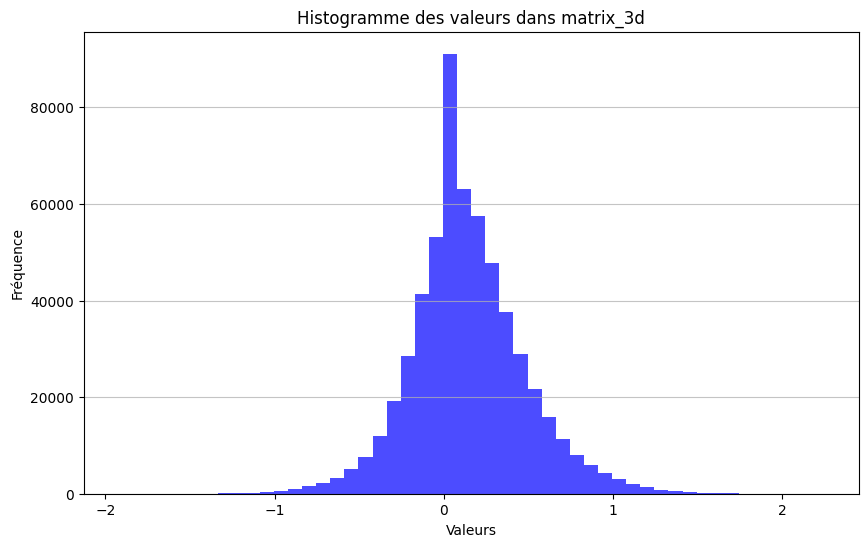

In [66]:
import matplotlib.pyplot as plt

# Aplatir la matrice 3D pour obtenir toutes les valeurs dans un tableau 1D
values = matrix_3d.flatten()

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(values, bins=50, color='blue', alpha=0.7)
plt.title("Histogramme des valeurs dans matrix_3d")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.grid(axis='y', alpha=0.75)
plt.show()

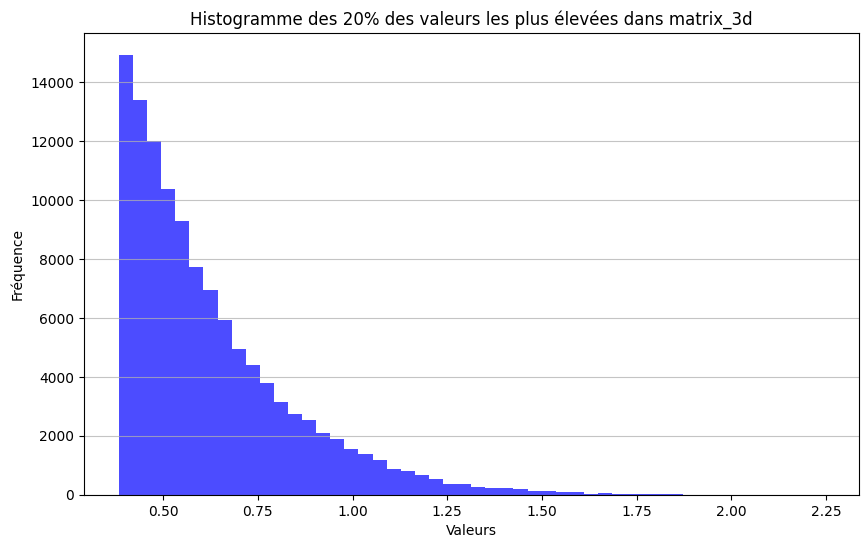

In [67]:
# Calculer le seuil correspondant aux 20% des valeurs les plus élevées
threshold = np.percentile(matrix_3d, 80)

# Remplacer les valeurs inférieures au seuil par 0
matrix_3d_top20 = np.where(matrix_3d >= threshold, matrix_3d, 0)

# Aplatir la matrice pour obtenir toutes les valeurs dans un tableau 1D
values_top20 = matrix_3d_top20.flatten()

# Tracer l'histogramme des valeurs restantes
plt.figure(figsize=(10, 6))
plt.hist(values_top20[values_top20 > 0], bins=50, color='blue', alpha=0.7)
plt.title("Histogramme des 20% des valeurs les plus élevées dans matrix_3d")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# Remplacer les valeurs inférieures ou égales à 0 par 0
matrix_3d = np.where(matrix_3d > 0, matrix_3d, 0)

array([[[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.268499,  0.234893,  0.183683, ...,  0.155786,  0.356583,
          0.4325  ],
        [ 0.175224,  0.343194,  0.369564, ...,  0.067928,  0.284667,
          0.561232],
        ...,
        [-0.415094,  0.13403 , -0.082105, ..., -0.001521, -0.015562,
          0.04387 ],
        [-0.162074,  0.047929, -0.091978, ..., -0.442933,  0.008545,
          0.196501],
        [ 0.391107,  0.379202, -0.039985, ...,  0.152956, -0.012421,
          0.14173 ]],

       [[ 0.268499,  0.234893,  0.183683, ...,  0.155786,  0.356583,
          0.4325  ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.211886,  0.702523,  0.044903, ...,  0.5466  ,  0.459381,
          0.486455],
        ...,
        [-0.264032,  0.187258, -0.700547, ...,  0.12538 , -0.033058,
         -0.096299],
        [ 0.005931,  0.088111,  0.021387, ...,  0.011063,  0.17638 ,
   

In [48]:
df_roi = pd.read_csv(os.path.join(BIDS_PATH,'derivatives_v2.0','NBS','Coord_ROI_atlas_inMNI.csv'))
df_roi

,Name_inFP2,X,Y,Z,RoroChoice,VolbrainSScort,VolbrainCort,Suit,Keuken,Glasser
0,3rd ventricle,0.572589,-10.558376,-4.117766,NaN,1.0,NaN,NaN,NaN,NaN
1,4th ventricle,0.297614,-44.120553,-33.088321,NaN,1.0,NaN,NaN,NaN,NaN
2,Right accumbens,9.388525,12.688525,-7.250820,1.0,1.0,NaN,NaN,NaN,NaN
3,Left accumbens,-9.303387,11.960236,-7.449190,1.0,1.0,NaN,NaN,NaN,NaN
4,Left amygdala,22.286025,-4.068067,-19.733526,1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
533,R_STSva,54.773684,-10.771053,-15.707895,NaN,NaN,NaN,NaN,NaN,1.0
534,R_TE1m,64.920093,-24.603675,-15.518810,NaN,NaN,NaN,NaN,NaN,1.0
535,R_PI,44.447070,-2.377127,-13.536862,NaN,NaN,NaN,NaN,NaN,1.0
536,R_a32pr,9.604651,28.588551,30.208408,NaN,NaN,NaN,NaN,NaN,1.0
